In [128]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import plotly.express as px
import plotly
import random

In [329]:
df = pd.read_csv('14th_cleaned_corpora.csv')

In [335]:
df.sort_values(by="year", inplace=True)

In [333]:
# one missing year
df.at[1807, 'year'] = 2019

In [336]:
df

,author,id_x,per_curiam,clean_text,case_name,citation_count,citations,date_filed,docket,judges,...,precedential_status,resource_uri,scdb_decision_direction,scdb_id,scdb_votes_majority,scdb_votes_minority,source,sub_opinions,year,corpora
1523,NaN,88200,False,76 U.S. 611 (____)9 Wall. 611WORTHYv.THE COMMI...,Worthy v. Commissioners,0.0,"[{'volume': 76, 'reporter': 'U.S.', 'page': '6...",1870-02-18,https://www.courtlistener.com:80/api/rest/v3/d...,NaN,...,Published,https://www.courtlistener.com:80/api/rest/v3/c...,1.0,1869-111,7.0,0.0,LR,['https://www.courtlistener.com:80/api/rest/v3...,1870.0,wall worthyvthe commissionerssupreme court uni...
1789,NaN,88503,False,80 U.S. 654 (____)13 Wall. 654OSBORNv.NICHOLSO...,Osborn v. Nicholson,24.0,"[{'volume': 80, 'reporter': 'U.S.', 'page': '6...",1872-04-22,https://www.courtlistener.com:80/api/rest/v3/d...,"Swayne Stated the Case, And",...,Published,https://www.courtlistener.com:80/api/rest/v3/c...,1.0,1871-158,7.0,1.0,LR,['https://www.courtlistener.com:80/api/rest/v3...,1872.0,wall osbornvnicholson et alsupreme court unite...
3851,https://www.courtlistener.com/api/rest/v3/peop...,88662,False,83 U.S. 130 (____)16 Wall. 130BRADWELLv.THE ST...,Bradwell v. State,74.0,"[{'volume': 83, 'reporter': 'U.S.', 'page': '1...",1873-04-15,https://www.courtlistener.com:80/api/rest/v3/d...,Miller,...,Published,https://www.courtlistener.com:80/api/rest/v3/c...,1.0,1872-153,8.0,1.0,LR,['https://www.courtlistener.com:80/api/rest/v3...,1873.0,wall bradwellvthe statesupreme court united st...
725,https://www.courtlistener.com/api/rest/v3/peop...,88661,False,83 U.S. 36 (____)16 Wall. 36SLAUGHTER-HOUSE CA...,Slaughter-House Cases,458.0,"[{'volume': 1872, 'reporter': 'U.S. LEXIS', 'p...",1873-04-14,https://www.courtlistener.com/api/rest/v3/dock...,"Miller, Now, April 14th, 1873",...,Published,https://www.courtlistener.com/api/rest/v3/clus...,2.0,1872-150,5.0,4.0,LR,['https://www.courtlistener.com/api/rest/v3/op...,1873.0,wall slaughter-house casesthe butcher benevole...
250,https://www.courtlistener.com/api/rest/v3/peop...,88800,False,85 U.S. 129 (1873)18 Wall. 129BARTEMEYERv.IOWA...,Bartemeyer v. Iowa,57.0,"[{'volume': 1873, 'reporter': 'U.S. LEXIS', 'p...",1874-03-18,https://www.courtlistener.com/api/rest/v3/dock...,"Miller, After Stating the Case",...,Published,https://www.courtlistener.com/api/rest/v3/clus...,1.0,1873-130,8.0,0.0,LR,['https://www.courtlistener.com/api/rest/v3/op...,1874.0,wall bartemeyerviowasupreme court united state...
2508,NaN,88998,False,88 U.S. 162 (____)21 Wall. 162MINORv.HAPPERSET...,Minor v. Happersett,97.0,"[{'volume': 88, 'reporter': 'U.S.', 'page': '1...",1875-03-29,https://www.courtlistener.com:80/api/rest/v3/d...,NaN,...,Published,https://www.courtlistener.com:80/api/rest/v3/c...,1.0,1874-147,9.0,0.0,LR,['https://www.courtlistener.com:80/api/rest/v3...,1875.0,wall minorvhappersettsupreme court united stat...
1045,https://www.courtlistener.com/api/rest/v3/peop...,89115,False,90 U.S. 331 (____)23 Wall. 331SCHOLEYv.REW.Sup...,Scholey v. Rew,15.0,"[{'volume': 90, 'reporter': 'U.S.', 'page': '3...",1875-01-25,https://www.courtlistener.com:80/api/rest/v3/d...,Clifford,...,Published,https://www.courtlistener.com:80/api/rest/v3/c...,2.0,1874-093,9.0,0.0,LR,['https://www.courtlistener.com:80/api/rest/v3...,1875.0,wall scholeyvrewsupreme court united state mr ...
3904,https://www.courtlistener.com/api/rest/v3/peop...,89233,False,91 U.S. 712 (____)RAYMONDv.THOMAS.Supreme Cour...,Raymond v. Thomas,7.0,"[{'volume': 91, 'reporter': 'U.S.', 'page': '7...",1876-02-28,https://www.courtlistener.com:80/api/rest/v3/d...,Swayne,...,Published,https://www.courtlistener.com:80/api/rest/v3/c...,1.0,1875-114,9.0,0.0,LR,['https://www.courtlistener.com:80/api/rest/v3...,1876.0,raymondvthomassupreme court united statesmr p ...
4491,https://www.courtlistener.com/api/rest/v3/peop...,89245,False,92 U.S. 90 (____)WALKERv.SAUVINET.Supreme Cour...,Walker v. Sauvinet,148.0,"[{'volume': 92, 'reporter': 'U.S.', 'pa

### BoW >> TF-IDF

Get columns

In [339]:
cols = ['id_x', 'year', 'case_name', 'corpora']

In [340]:
corp = df[cols].copy()

In [341]:
corp

,id_x,year,case_name,corpora
1523,88200,1870.0,Worthy v. Commissioners,wall worthyvthe commissionerssupreme court uni...
1789,88503,1872.0,Osborn v. Nicholson,wall osbornvnicholson et alsupreme court unite...
3851,88662,1873.0,Bradwell v. State,wall bradwellvthe statesupreme court united st...
725,88661,1873.0,Slaughter-House Cases,wall slaughter-house casesthe butcher benevole...
250,88800,1874.0,Bartemeyer v. Iowa,wall bartemeyerviowasupreme court united state...
2508,88998,1875.0,Minor v. Happersett,wall minorvhappersettsupreme court united stat...
1045,89115,1875.0,Scholey v. Rew,wall scholeyvrewsupreme court united state mr ...
3904,89233,1876.0,Raymond v. Thomas,raymondvthomassupreme court united statesmr p ...
4491,89245,1876.0,Walker v. Sauvinet,walkervsauvinetsupreme court united state mr c...
422,89266,1876.0,United States v. REESE,united statesvreese et alsupreme court united ...


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# fit = bow; .get_feature_names()
vect = CountVectorizer(ngram_range=(1,3))

# dense: pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

In [11]:
# .transform() = dtm; matrix populated with token counts to represent our messages in sparse format

# def wm_to_df(wm, feat_names):
#    # create an index for each row
#    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
#    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
#                      columns=feat_names)
#    return(df)
#

def make_bow(df_col):
    #custom_vec = CountVectorizer(ngram_range=(1,3))
    custom_vec = CountVectorizer(strip_accents="unicode", stop_words)
    corpora = df_col.values.flatten().tolist()
    wm = custom_vec.fit_transform(corpora)
    vocab = custom_vec.vocabulary_
    tokens = custom_vec.get_feature_names()
    #df = wm_to_df(wm, tokens)
    
    return wm, tokens, vocab #df, tokens

# Tune the vectorizer with gridsearch...
# ngram_range=(1, 2) # number of ngrams
# max_df=0.75 # ignore terms appearing in >75% of documents 
# min_df=1 # ignore terms that only appear in x documents (dangerous bc of case names)

In [12]:
wordmatrix, features, vocab = make_bow(corp['corpora'])

In [14]:
def bow_df(vocab):
    vv = list(vocab.values())
    vk = list(vocab.keys())
    count_df = pd.DataFrame(list(zip(vk,vv)))
    count_df.columns = ['Word', 'Count']
    count_df.sort_values(by='Count', ascending=False, inplace=True)
    return count_df

count_df = bow_df(vocab)

In [191]:
count_df

,Word,Count
95376,ถถ,194125
45320,งง,194124
10593,ætna,194123
106542,zzz,194122
71374,zywicke,194121
100798,zyme,194120
145852,zylstra,194119
94477,zykan,194118
112058,zygmunt,194117
124789,zydok,194116


In [17]:
import numpy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline

In [367]:
from sklearn.feature_extraction import text 

my_additional_stop_words=['15','2628','446','2607','419''____','petition','supreme','rehearing','sugg','plaintiff', 'error', 'employés', '000','ch','said','company','united', 'federal', 'district', 'right', 'id', 'opinion',
'law', 'case', 'state', 'court','sentence','petitioner','pub','280','ch',
'statute','case', 'ct', 'mr', 'ถถ', 'งง', 'zzz','supra','infra','appellant','appellee', 'id', '413', '93', '37', '1973']
more_stop_words=['act', 'make', 'ante', 'cite', 'claim', 'respondent','rule','shall','judgment','say', 'ed', '2d', 'ct']

stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words, more_stop_words)

In [58]:
# vectorizer to convert raw documents to TF/IDF matrix

vectorizer = TfidfVectorizer(stop_words=stop_words,
                             strip_accents="unicode",
                             use_idf=True, 
                             smooth_idf=True)

# Normalizes the vector (L2 norm of 1.0) to normalize 
# the effect of document length on tf-idf

normalizer = Normalizer(copy=False)

In [59]:
# Perform SVD
# Project the tfidf vectors onto the first N principal components.

svd_model = TruncatedSVD(n_components=100,         # num dimensions
                         algorithm='randomized',
                         n_iter=10)

lsa_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model),
                            ('norm', normalizer)])

In [21]:
def lsa_transform(df_col):
    corpora = df_col.values.flatten().tolist()
    lsa_matrix = lsa_transformer.fit_transform(corpora)

    print(f"tf-idf params: {lsa_transformer.steps[0][1].get_params()}")

    # Get the words that correspond to each of the features.
    feat_names = lsa_transformer.steps[0][1].get_feature_names()
    vocab = lsa_transformer.steps[0][1].vocabulary_
    
    return lsa_matrix, feat_names, vocab

lsa_matrix, feat_names, lsa_vocab = lsa_transform(corp['corpora'])

tf-idf params: {'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 1), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': frozenset({'are', 'put', 'among', 'already', 'take', 'itself', 'your', 'above', 'some', 'whom', 'yet', 'part', 'hereupon', 'been', 'ours', 'since', 'afterwards', 'none', 'will', 'often', 'same', 'fifteen', 'both', 'through', 'eg', 'may', 'its', 'i', 'for', 'to', 'thru', 'amount', 'ever', 'sometimes', 'de', 'ourselves', 'without', 'him', 'hers', 'cant', 'such', 'whereupon', 'งง', 'yourself', 'their', 'off', 'five', 'somewhere', 'move', 'sincere', 'federal', 'rather', 'formerly', 'alone', 'nine', 'myself', 'keep', 'mill', 'couldnt', 'find', 'further', 'this', 'hundred', 'a', 'court', 'them', 'between', 'although', 'when', 'enough', 'mine', 're', 'interest', 'what', 'empty', 'id

In [22]:
lsa_matrix

array([[ 5.95680658e-01, -3.29499257e-02, -8.02992724e-02, ...,
         3.65053175e-02, -8.60266007e-02, -2.72642648e-02],
       [ 3.28573172e-01, -5.41233614e-02, -1.75900766e-01, ...,
         4.65462215e-02, -2.98833655e-01,  1.64875783e-03],
       [ 5.14405756e-01,  1.50660311e-01, -3.58792597e-02, ...,
        -1.59492971e-02, -1.11110792e-01, -1.14017217e-01],
       ...,
       [ 4.47183069e-01, -6.43620708e-02, -2.61567267e-01, ...,
        -6.39565586e-02, -3.72706352e-02, -2.27679458e-02],
       [ 5.32268019e-01, -2.39050461e-01, -7.00855888e-02, ...,
        -4.77057340e-04, -7.78777086e-02,  1.05030417e-01],
       [ 4.37605131e-01, -1.30584150e-01, -1.36273205e-01, ...,
         1.77815563e-02,  1.01386066e-01,  3.10702947e-02]])

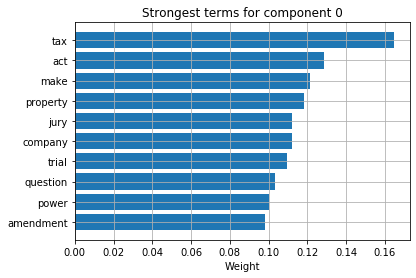

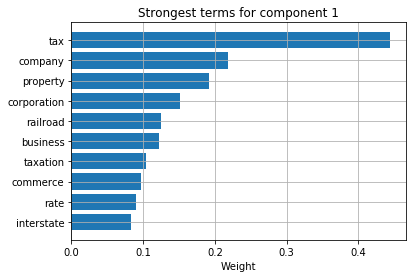

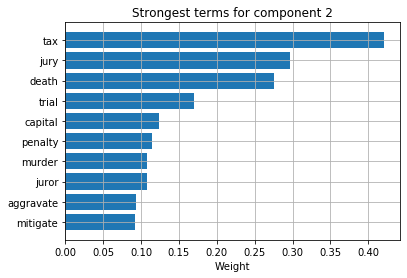

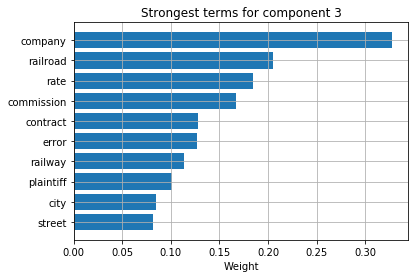

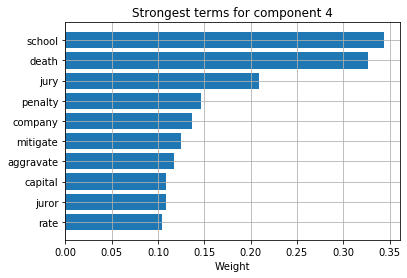

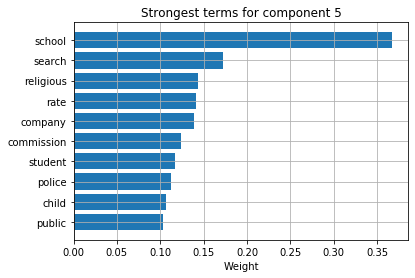

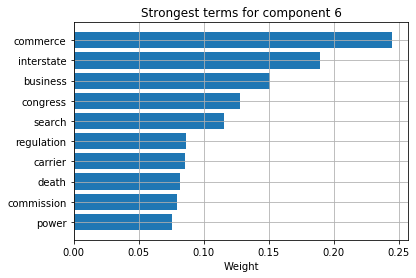

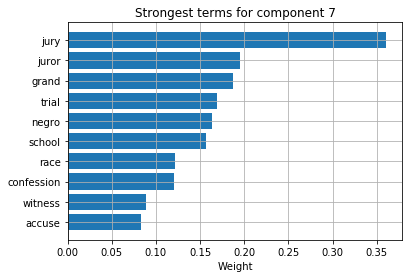

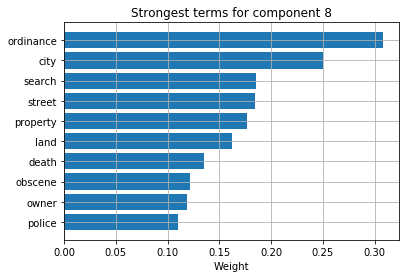

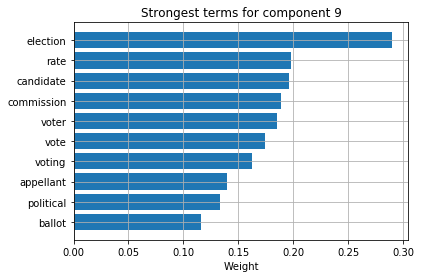

In [36]:
import matplotlib.pyplot as plt
import matplotlib
for component_num in range(0, 10):

    comp = lsa_transformer.steps[1][1].components_[component_num]
    
    # Sort the weights in the first component and get indices
    indices = numpy.argsort(comp).tolist()
    
    # Reverse order (largest weights first)
    indices.reverse()
    
    # Get top 10 terms for component        
    terms = [feat_names[weight_index] for weight_index in indices[0:10]]    
    weights = [comp[weight_index] for weight_index in indices[0:10]]    
   
    # Display these terms and their weights as a horizontal bar graph.    
    # The horizontal bar graph displays the first item on the bottom; reverse
    # the order of the terms so the biggest one is on top.
    terms.reverse()
    weights.reverse()
    positions = numpy.arange(10) + .5    # the bar centers on the y axis
    
    plt.figure(component_num)
    plt.barh(positions, weights, align="center")
    plt.yticks(positions, terms)
    plt.xlabel("Weight")
    plt.title(f"Strongest terms for component {component_num}")
    plt.grid(True)
    plt.savefig(f"terms_for_component_{component_num}")
    plt.show()

## Rolling window topic modeling

In [343]:
first_year = 1875
last_year  = 2018
increment  = 20
overlap    = increment // 2
# ------------------------

# ------------------------

# intended use: include left, exclude right
# half-closed, half-open interval [a, b)
def build_year_ranges(first, last, inc, over):
    year_ranges = []
    for n in range(first, last, over):
        year_ranges.append((n, n + inc))
    return year_ranges


# warning: years must have the same index as data
def put_data_under_year_ranges(data, years, year_ranges):

    # assert len(data) == len(years), \
    # "get_content_under_ranges: data and years do not match length"

    # build a dict with keys = year_ranges, with a list for each range
    data_ranges = dict()
    for y in year_ranges:
        data_ranges[y] = []

    # bin all the data by range - each row should fall in two bins, 
    # if ranges are cleanly overlapped

    # if data is a list
    for i in range(len(data)):
        for y in year_ranges:
            if y[0] <= years[i] and years[i] < y[1]:
                data_ranges[y].append(data[i])
                # this should happen twice for every entry except 
                # the very oldest and the very newest

    # pandas df
    return data_ranges

# ------------
# main
    
cases = []
years = []
corpora = []
              
for i in range(500):
    years.append(first_year, last_year)
    i = 0, len(corpora)-1
    j = 0, len(corpora)-1
    cases.append(corpora[i] + ' ' + corpora[j])
    
# and bin them
bins = build_year_ranges(first_year, last_year, increment, overlap)
binned_data = put_data_under_year_ranges(cases, years, bins)

In [388]:
corp_list = corp["corpora"].values.flatten().tolist()
year_list = corp["year"].values.flatten().tolist()
names_list = corp["case_name"].values.flatten().tolist()

In [396]:
case_dict = np.array(list(zip(names_list, corp_list)))

In [ ]:
case_dict

In [345]:
# year_ranges = build_year_ranges(first_year, last_year, increment, overlap)
# binned_data = put_data_under_year_ranges(corp_list, year_list, year_ranges

In [346]:
run_year_range_build()

In [347]:
year_ranges

[(1875, 1895),
 (1885, 1905),
 (1895, 1915),
 (1905, 1925),
 (1915, 1935),
 (1925, 1945),
 (1935, 1955),
 (1945, 1965),
 (1955, 1975),
 (1965, 1985),
 (1975, 1995),
 (1985, 2005),
 (1995, 2015),
 (2005, 2025),
 (2015, 2035)]

In [348]:
for k,v in binned_data.items():
    print(f"Number of cases decided circa {k}: {len(v)}")

Number of cases decided circa (1875, 1895): 142
Number of cases decided circa (1885, 1905): 344
Number of cases decided circa (1895, 1915): 579
Number of cases decided circa (1905, 1925): 761
Number of cases decided circa (1915, 1935): 729
Number of cases decided circa (1925, 1945): 576
Number of cases decided circa (1935, 1955): 488
Number of cases decided circa (1945, 1965): 505
Number of cases decided circa (1955, 1975): 877
Number of cases decided circa (1965, 1985): 1380
Number of cases decided circa (1975, 1995): 1324
Number of cases decided circa (1985, 2005): 747
Number of cases decided circa (1995, 2015): 364
Number of cases decided circa (2005, 2025): 227
Number of cases decided circa (2015, 2035): 71


In [349]:
num_cases = list(zip(years_k, values_v))

In [350]:
num_df = pd.DataFrame(num_cases)
num_df.columns = ["Years", "Approx. No. Opinions Issued"]
num_df.Years = num_df.Years.apply(lambda x: (x[0]+x[1])/2)
fig = px.bar(num_df, x='Years', y='Approx. No. Opinions Issued')
fig.show()

In [360]:
def LSA_per_bin(corpora):

    # assert: first pipeline component must be tfidf/count vectorizer
    lsa_matrix = lsa_transformer.fit_transform(corpora)

    # Get the words that correspond to each of the features.
    feat_names = lsa_transformer.steps[0][1].get_feature_names()
    vocab = lsa_transformer.steps[0][1].vocabulary_

    for component_num in range(0, 10):
    
        comp = lsa_transformer.steps[1][1].components_[component_num]
        
        # Sort the weights in the first component and get indices
        indices = np.argsort(comp).tolist()
        
        # Reverse order (largest weights first)
        indices.reverse()
        
        # Get top 10 terms for component        
        terms = [feat_names[weight_index] for weight_index in indices[0:10]]    
        weights = [comp[weight_index] for weight_index in indices[0:10]] 
        terms.reverse()
        weights.reverse()
       
        # Display these terms and their weights as a horizontal bar graph.    

        bin_terms = terms
        bin_weights = weights
        bin_matrix = lsa_matrix
        bin_feat_names = feat_names
        bin_vocab = vocab
        
    return {"terms": bin_terms, "weights": bin_weights, "matrix": bin_matrix, "feat_names": bin_feat_names, "vocab": bin_vocab}
        
def run_LSA_on_bins(binned_data, year_ranges):    
    
    model_ranges = dict()
    for y in year_ranges:
        model_ranges[y] = []
    
    for y in year_ranges:
        model_ranges[y].append(LSA_per_bin(binned_data[y]))
        print(f"Running cases from: {y}") 
        
    return model_ranges    
    

In [363]:
lsa = run_LSA_on_bins(binned_data, year_ranges)

Running cases from: (1875, 1895)
Running cases from: (1885, 1905)
Running cases from: (1895, 1915)
Running cases from: (1905, 1925)
Running cases from: (1915, 1935)
Running cases from: (1925, 1945)
Running cases from: (1935, 1955)
Running cases from: (1945, 1965)
Running cases from: (1955, 1975)
Running cases from: (1965, 1985)
Running cases from: (1975, 1995)
Running cases from: (1985, 2005)
Running cases from: (1995, 2015)
Running cases from: (2005, 2025)
Running cases from: (2015, 2035)


In [368]:
for k,v in lsa.items():
    print(f"terms for {k}:\n{lsa[k][0]['terms']}")

terms for (1875, 1895):
['offence', 'conviction', 'infamous', 'ch', 'death', 'indictment', 'capital', 'prison', 'punishment', 'crime']
terms for (1885, 1905):
['owner', 'river', 'insurance', 'title', 'injury', 'navigable', 'jury', 'water', 'damage', 'land']
terms for (1895, 1915):
['new', 'insurance', 'company', 'compensation', 'navigable', 'property', 'river', 'jury', 'water', 'land']
terms for (1905, 1925):
['kentucky', 'business', 'improvement', 'policy', 'assess', 'valuation', 'value', 'insurance', 'board', 'assessment']
terms for (1915, 1935):
['drainage', 'estate', 'trust', 'insurance', 'death', 'water', 'company', 'transfer', 'contract', 'land']
terms for (1925, 1945):
['bank', 'negro', 'property', 'assessment', 'price', 'stock', 'jury', 'value', 'confession', 'milk']
terms for (1935, 1955):
['jury', 'license', 'dealer', 'company', 'business', 'price', 'new', 'york', 'insurance', 'milk']
terms for (1945, 1965):
['passenger', 'school', 'regulation', 'train', 'alien', 'counsel', '

In [ ]:
# https://www.courtlistener.com/opinion/108838/miller-v-california/

In [147]:
# def kmeans_topics(binned_data, n_clusters):
#     vectorizer = TfidfVectorizer(stop_words=stop_words,
#                              strip_accents="unicode",
#                              use_idf=True, 
#                              smooth_idf=True)
#     kmeans = KMeans(n_clusters).fit(vectorizer)
#     kmeans.predict(tfidf_vectorizer.transform(binned_data))
#     
#     #kmeans_pipe = Pipeline([('tfidf', vectorizer), 
#                             #('kmeans', kmeans)]) # ('norm', normalizer)   

Optimal # of clusters for whole 14th corpus?

In [ ]:
from sklearn.metrics import silhouette_score
from tqdm import tqdm_notebook
distorsions = []
sil_scores = []
k_max = 25
vectorizer = TfidfVectorizer(max_df=0.95,
                                     min_df=1, ngram_range=(1,2),
                                     stop_words=stop_words,
                                     use_idf=True)
#vz = vectorizer.fit_transform(corpora)

for k in tqdm_notebook(range(2, k_max)):
    kmeans_model = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=1, random_state=42,  
                         init_size=500, verbose=True, max_iter=1000)
    #kmeans_model.fit(vz)
    
    km_transformer = Pipeline([('tfidf', vectorizer), 
                            ('km', kmeans_model),
                            ('norm', normalizer)])
    
    km = km_transformer.fit_transform(corpora)
    
    # sil_score = silhouette_score(vz, kmeans_model.labels_)
    sil_score = silhouette_score(km, km_transformer.steps[1][1].labels_)
    sil_scores.append(sil_score)
    # distorsions.append(kmeans_model.inertia_)
    distorsions.append(km_transformer.steps[1][1].inertia_)

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))

ax1.plot(range(2, k_max), distorsions)
ax1.set_title('Distorsion vs num of clusters')
ax1.grid(True)

ax2.plot(range(2, k_max), sil_scores)
ax2.set_title('Silhouette score vs num of clusters')
ax2.grid(True)

In [369]:
def k_means_cluster(corpora, n_clusters=15, ngrams=(1,1)):
    print("%d documents" % len(corpora))
    
    print("Extracting features from the training dataset "
          "using a sparse vectorizer")
    t0 = time()
    
    vectorizer = TfidfVectorizer(max_df=0.95,
                                     min_df=1, ngram_range=ngrams,
                                     stop_words=stop_words,
                                     use_idf=True)
    km = MiniBatchKMeans(n_clusters=n_clusters, init='k-means++', n_init=100,
                             init_size=500, batch_size=1000)
    X = vectorizer.fit_transform(corpora)
    
    
    print("done in %fs" % (time() - t0))
    print("n_samples: %d, n_features: %d" % X.shape)
    print()
    
    
    print("Clustering sparse data with %s" % km)
    t0 = time()
    km.fit(X)
    print("done in %0.3fs" % (time() - t0))
    print()
    
    
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, km.labels_)) # sample size=5000
    
    print()
    print("Top terms per cluster:")
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]
    
    terms = vectorizer.get_feature_names()
    for i in range(n_clusters):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
            print()       
    
    
    clusters = {}
    for i in range(n_clusters):
        clusters[i] = []
        for ind in order_centroids[i, :10]:
            clusters[i].append(terms[ind])
    clusters['labels'] = km.labels_
    clusters['vocabulary'] = vectorizer.vocabulary_
    return clusters

In [373]:
corpora = corp["corpora"].values.flatten().tolist()
cluster = k_means_cluster(corpora)

4579 documents
Extracting features from the training dataset using a sparse vectorizer
done in 8.312539s
n_samples: 4579, n_features: 193883

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=500, max_iter=100, max_no_improvement=10, n_clusters=15,
        n_init=100, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=False)
done in 16.183s

Silhouette Coefficient: 0.019

Top terms per cluster:
Cluster 0: abortion
 woman
 physician
 pregnancy
 roe
 medical
 clinic
 health
 minor
 fetus
Cluster 1: school
 congress
 election
 public
 government
 political
 religious
 board
 action
 power
Cluster 2: trial
 counsel
 criminal
 evidence
 defendant
 search
 appeal
 police
 confession
 conviction
Cluster 3: death
 jury
 penalty
 mitigate
 aggravate
 capital
 punishment
 murder
 circumstance
 eighth
Cluster 4: jeopardy
 double
 trial
 offense
 prosecution
 conviction
 murder
 charge
 defendant
 criminal
Cluste

In [375]:
cluster['labels']

array([5, 5, 1, ..., 1, 2, 4], dtype=int32)

In [376]:
corp['topics'] = cluster['labels']

In [377]:
top_cols = ['case_name', 'year', 'topics']
topic_df = corp[top_cols]

In [380]:
topic_df.head(10)

,case_name,year,topics
1523,Worthy v. Commissioners,1870.0,5
1789,Osborn v. Nicholson,1872.0,5
3851,Bradwell v. State,1873.0,1
725,Slaughter-House Cases,1873.0,5
250,Bartemeyer v. Iowa,1874.0,12
2508,Minor v. Happersett,1875.0,1
1045,Scholey v. Rew,1875.0,11
3904,Raymond v. Thomas,1876.0,5
4491,Walker v. Sauvinet,1876.0,5
422,United States v. REESE,1876.0,1


In [381]:
corp_list = corpora
year_list = corp["year"].values.flatten().tolist()
year_ranges = build_year_ranges(first_year, last_year, increment, overlap)
binned_data = put_data_under_year_ranges(corp_list, year_list, year_ranges)
model_ranges = dict()
for y in year_ranges:
    model_ranges[y] = []
    
for y in year_ranges:
    print(f"Running cases from: {y}")
    print()
    model_ranges[y].append(k_means_cluster(binned_data[y], n_clusters=6, ngrams=(1,2)))

#topic_df_14th = am14[topic_cols]

Running cases from: (1875, 1895)

142 documents
Extracting features from the training dataset using a sparse vectorizer
done in 0.689204s
n_samples: 142, n_features: 153094

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=500, max_iter=100, max_no_improvement=10, n_clusters=6,
        n_init=100, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=False)
done in 3.703s

Silhouette Coefficient: 0.010

Top terms per cluster:
Cluster 0: ordinance
 laundry
 business
 city county
 city
 wash
 county
 ashland
 francisco
 san francisco
Cluster 1: tax
 railroad
 taxation
 assessment
 property
 county
 value
 assess
 stock
 bank
Cluster 2: property
 person
 jurisdiction
 defendant
 jury
 question
 citizen
 process
 trial
 power
Cluster 3: railroad
 corporation
 fence
 road
 damage
 cattle
 injury
 negligence
 cattle guard
 railway
Cluster 4: citizen
 congress
 vote
 election
 person
 elector
 power
 race
 gov

done in 39.349s

Silhouette Coefficient: 0.012

Top terms per cluster:
Cluster 0: school
 religious
 education
 public school
 religion
 public
 child
 student
 board
 church
Cluster 1: jury
 public
 power
 new
 ordinance
 person
 negro
 city
 congress
 constitutional
Cluster 2: tax
 commerce
 interstate
 insurance
 property
 business
 interstate commerce
 labor
 power
 corporation
Cluster 3: apportionment
 population
 county
 seat
 representation
 election
 house
 representative
 vote
 legislature
Cluster 4: communist
 organization
 committee
 communist party
 question
 government
 party
 answer
 member
 membership
Cluster 5: trial
 confession
 counsel
 jury
 habeas
 habeas corpus
 defendant
 corpus
 conviction
 judge
Running cases from: (1955, 1975)

877 documents
Extracting features from the training dataset using a sparse vectorizer
done in 9.071971s
n_samples: 877, n_features: 1197075

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means+

In [382]:
model_ranges

{(1875,
  1895): [{0: ['ordinance',
    'laundry',
    'business',
    'city county',
    'city',
    'wash',
    'county',
    'ashland',
    'francisco',
    'san francisco'],
   1: ['tax',
    'railroad',
    'taxation',
    'assessment',
    'property',
    'county',
    'value',
    'assess',
    'stock',
    'bank'],
   2: ['property',
    'person',
    'jurisdiction',
    'defendant',
    'jury',
    'question',
    'citizen',
    'process',
    'trial',
    'power'],
   3: ['railroad',
    'corporation',
    'fence',
    'road',
    'damage',
    'cattle',
    'injury',
    'negligence',
    'cattle guard',
    'railway'],
   4: ['citizen',
    'congress',
    'vote',
    'election',
    'person',
    'elector',
    'power',
    'race',
    'government',
    'color'],
   5: ['commerce',
    'liquor',
    'power',
    'intoxicate',
    'intoxicate liquor',
    'manufacture',
    'sale',
    'congress',
    'regulation',
    'public'],
   'labels': array([4, 1, 2, 2, 4, 4, 1, 5, 

list

In [298]:
#for k in model_ranges.keys():
#    print(sorted(model_ranges[k][0][0])) #topic 0

for k in model_ranges.keys():
    for j in range(len(model_ranges[k][0])-1):
        if "company" in model_ranges[k][0][j]:
            print(f"'company' in range {k}, topic {j}: \n{model_ranges[k][0][j]}\n\n") 
        #for term in model_ranges[k][0][j]:
            #if term in (sorted(model_ranges[k][0][j])):
                #print(f"'{term}' in range {k}, topic {j}: \n{model_ranges[k][0][j]}\n\n")

'company' in range (1875, 1895), topic 3: 
['tax', 'business', 'corporation', 'taxation', 'capital', 'company', 'corporations', 'shares', 'property', 'value']


'company' in range (1875, 1895), topic 5: 
['grain', 'public', 'railroad', 'elevator', 'business', 'company', 'property', 'use', 'charges', 'government']


'company' in range (1875, 1895), topic 6: 
['negligence', 'injuries', 'damages', 'company', 'cattle', 'employés', 'railway', 'guards', 'railroad', 'fences']


'company' in range (1875, 1895), topic 7: 
['property', 'railroad', 'company', 'said', 'contract', 'taxes', 'county', 'assessment', 'board', 'road']


'company' in range (1885, 1905), topic 1: 
['railroad', 'company', 'property', 'railway', 'corporations', 'negligence', 'damages', 'public', 'employés', 'protection']


'company' in range (1885, 1905), topic 3: 
['tax', 'property', 'taxation', 'taxes', 'value', 'stock', 'company', 'capital', 'shares', 'railroad']


'company' in range (1885, 1905), topic 6: 
['company', '